In this project, I will use an imbalanced machine learning dataset,Adult_Incom dataset and I used 'adult_data.csv' file. The dataset was drawn from the United States Census Bureau data and involves using personal details such as education level to predict whether an individual will earn more or less than $50,000 per year based on attributes such as education, hours of work per week, etc...



The dataset contains 14 input variables that are a mixture of categorical, ordinal, and numerical data types. 
The complete list of variables is as follows:
Age
Workclass
Final Weight//  sampling weight
Education// Education Number of Years
Marital-status
Occupation
Relationship
Race
Sex
Capital-gain//capital-loss // income from investment sources other than salary/wages
Hours-per-week
Native-country

In modeling, I used 3 algorithms which are Logistic Regression, KNN and Random Froest 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('adult_data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

### Exploring Data in the dataset

In [8]:
print('workclass',df.workclass.unique())
print('education',df.education.unique())
print('marital-status',df['marital-status'].unique())
print('occupation',df.occupation.unique())
print('relationship',df.relationship.unique())
print('race',df.race.unique())
print('gender',df.sex.unique())
print('native-country',df['native-country'].unique())
print('salary',df.salary.unique())

workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
gender ['Male' 'Female']
native-country ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canad

from the above output we can see there are some missing values which apeer as '?' mark in some columns
and the salary column (Our target ) contain 2 different values which are ['<=50K' '>50K'] and it is a binary classification


#### 1) change '<=50K' values into 0 and '>50K' into 1

In [9]:
df['salary']=df['salary'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


 2) replace all '?' marks with NAN values

In [10]:
from numpy import nan
df = df.replace('?',nan)

Now I can calculate Null values 

In [11]:
df.isna().sum()/len(df)*100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.790486
salary            0.000000
dtype: float64

as can seen from the above there are 5.6% null values in workclass 
  5.7% in occupation 
  and 1.8% in native-country   
So I will replace all null values with the most_frequent occurring value of that column.


In [12]:
df['native-country'].fillna(df['native-country'].mode()[0],inplace = True)

In [13]:
df['workclass'].fillna(df['workclass'].mode()[0],inplace = True)

In [14]:
df['occupation'].fillna(df['occupation'].mode()[0],inplace = True)

In [15]:
# I will drop the education and fnlwgt because I don't need them for modeling
df.drop(['fnlwgt', 'education'], axis=1, inplace=True)

In [16]:
df2=df.copy()


# Data Exploring

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000220BB5EECA0>,
      dtype=object)

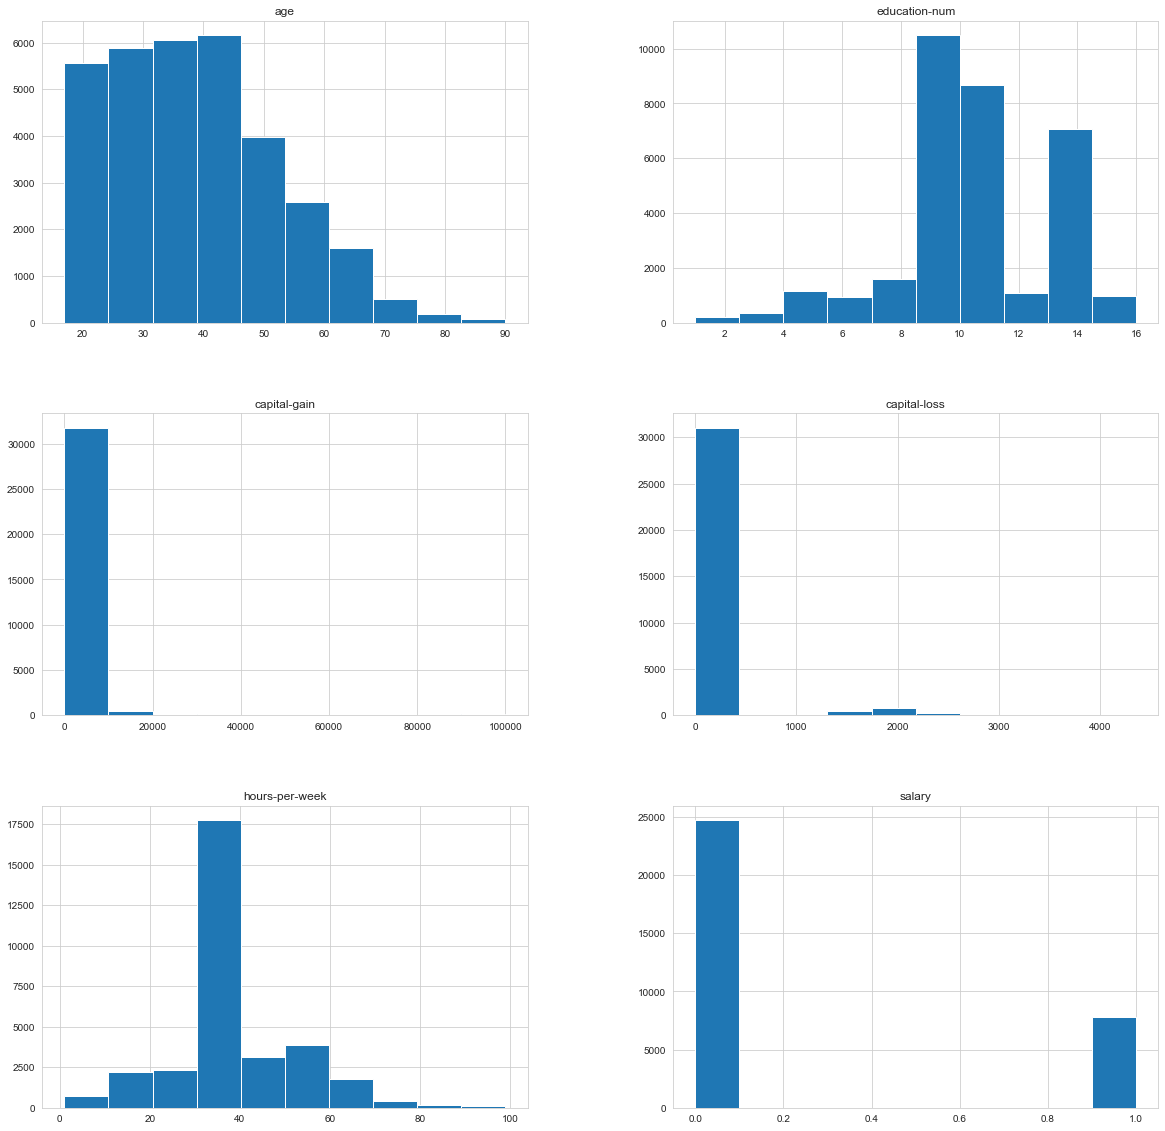

In [95]:
df.hist(figsize=(20,20))

The above histogram shows the majority of ages between 15-50 years, education between high school to Bachelor degree
In addition, the majority of sample have 0 capital gain and capital loss as well and most of the work 40 hpw
finally, it is imbalanced data set

C:\Users\manal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


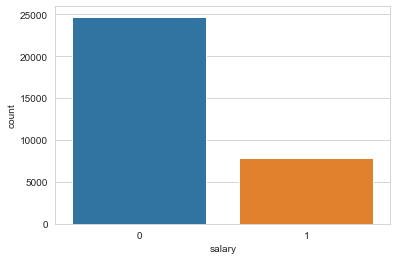

In [109]:
sns.countplot(df['salary'])

In [110]:
df['salary'].value_counts(normalize=True)

0    0.75919
1    0.24081
Name: salary, dtype: float64

### Age and Salary 

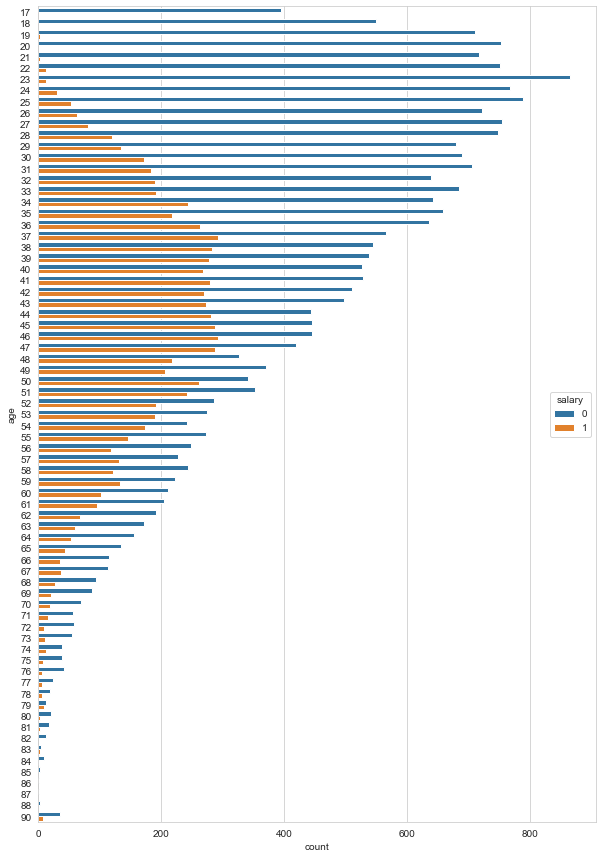

In [29]:
plt.figure(figsize=[10,15])
sns.countplot(y='age', hue='salary', data = df)

### workclass and Salary

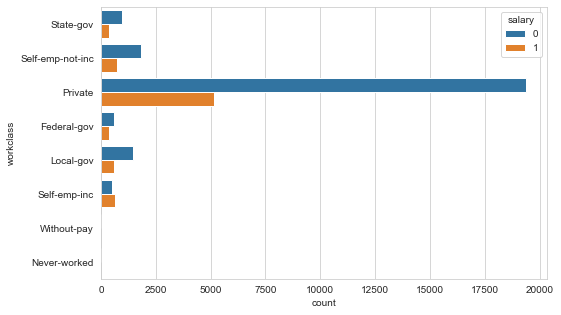

In [24]:
plt.figure(figsize=[8,5])
sns.countplot(y='workclass', hue='salary', data = df)

### occupation and salary

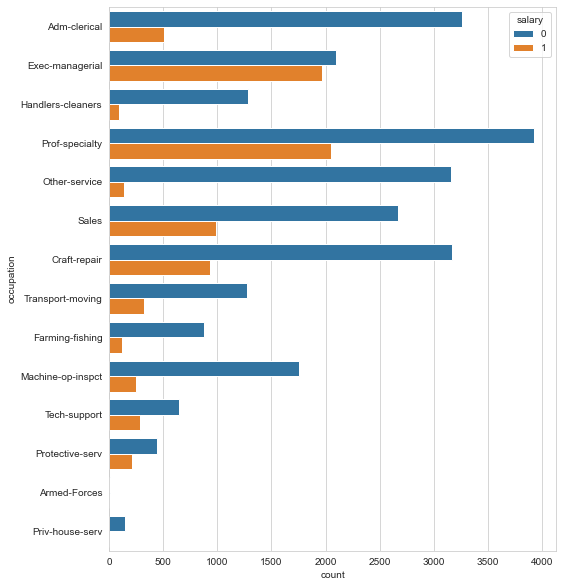

In [26]:
plt.figure(figsize=[8,10])
sns.countplot(y='occupation', hue='salary', data = df)

<Figure size 1080x1080 with 0 Axes>

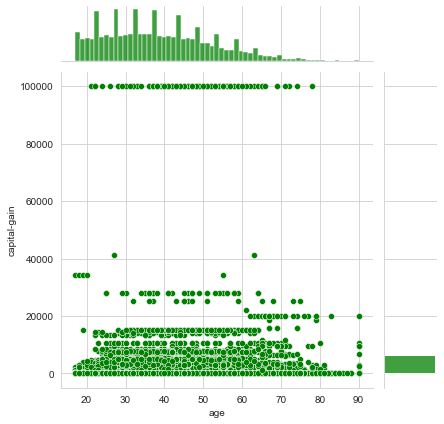

In [97]:
plt.figure(figsize=[15,15])
sns.jointplot(x='age',y='capital-gain',data=df,color='green',kind='scatter')


<Figure size 1440x1080 with 0 Axes>

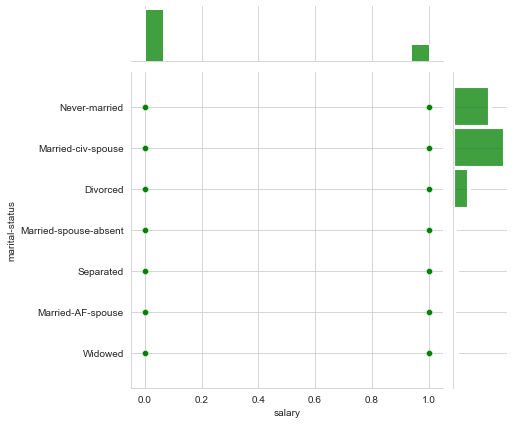

In [98]:
plt.figure(figsize=[20,15])
sns.jointplot(x='salary',y='marital-status',data=df,color='green',kind='scatter')


The chart shows no relation between salary and marital status

<Figure size 1440x1080 with 0 Axes>

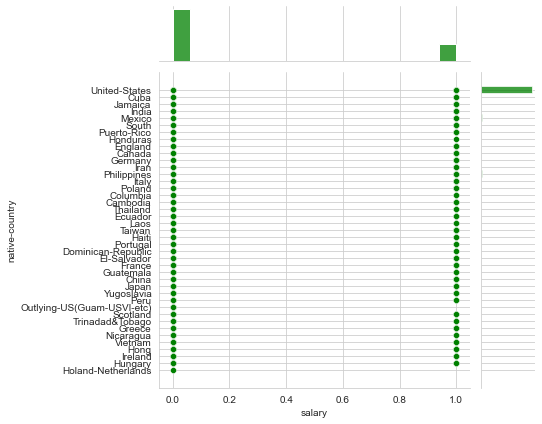

In [32]:
plt.figure(figsize=[20,15])
sns.jointplot(x='salary',y='native-country',data=df,color='green',kind='scatter')


and no relation between salary and native country as well

<Figure size 1440x1080 with 0 Axes>

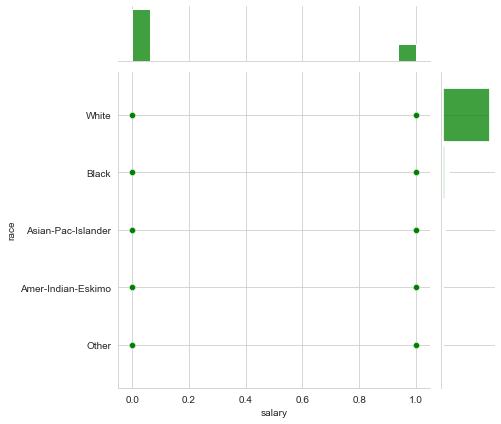

In [27]:
plt.figure(figsize=[20,15])
sns.jointplot(x='salary',y='race',data=df,color='green',kind='scatter')


<Figure size 1440x1080 with 0 Axes>

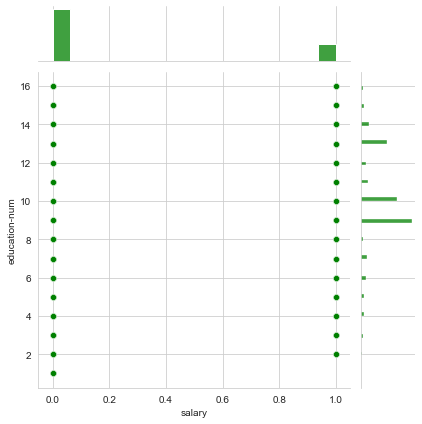

In [99]:
plt.figure(figsize=[20,15])
sns.jointplot(x='salary',y='education-num',data=df,color='green',kind='scatter')


<Figure size 1440x1080 with 0 Axes>

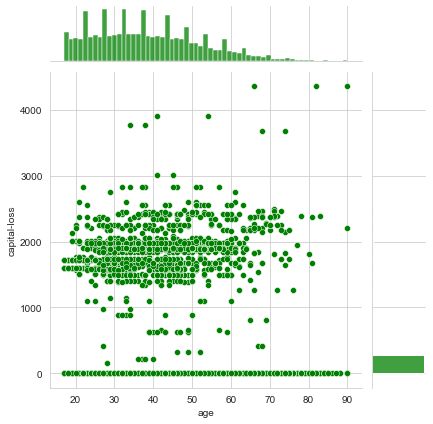

In [100]:
plt.figure(figsize=[20,15])
sns.jointplot(x='age',y='capital-loss',data=df,color='green',kind='scatter')


C:\Users\manal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


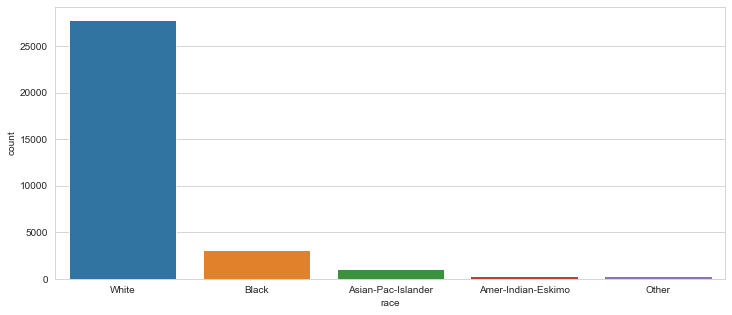

In [101]:
plt.figure(figsize=(12,5))
sns.countplot(df.race,data=df)

In [ ]:
sns.pairplot(df,hue='salary',palette='bwr',kind='kde',height=1)

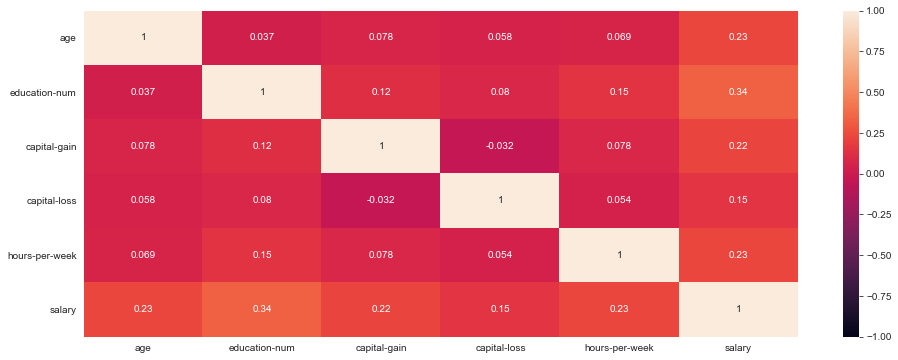

In [108]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),vmin=-1,
    vmax=1,annot=True)

In [39]:
df.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,0.036527,0.077674,5.777454e-02,0.068756,0.234037,0.060901,-0.019362,-0.188702,0.102692,...,0.004242,0.008374,0.002583,0.000613,-0.013816,-0.006271,0.004843,0.017993,-1.505357e-02,0.000375
education-num,0.036527,1.000000,0.122630,7.992296e-02,0.148123,0.335154,0.097941,-0.015117,-0.168038,0.077358,...,-0.044286,-0.041269,0.001264,0.016046,0.049472,0.007896,-0.017071,0.122965,-7.483035e-03,-0.001234
capital-gain,0.077674,0.122630,1.000000,-3.161506e-02,0.078409,0.223329,-0.007007,-0.002140,-0.049602,0.096885,...,-0.003879,-0.006103,-0.001680,0.005323,0.005735,-0.003432,-0.003526,0.011299,-2.564276e-03,-0.002193
capital-loss,0.057775,0.079923,-0.031615,1.000000e+00,0.054256,0.150526,0.014668,-0.003177,-0.037895,0.031714,...,-0.007308,-0.004718,-0.004160,0.010114,0.006637,-0.005095,0.008102,0.014458,-5.997599e-07,-0.004804
hours-per-week,0.068756,0.148123,0.078409,5.425636e-02,1.000000,0.229689,0.011576,-0.014262,-0.112563,0.127869,...,0.003973,-0.008964,0.001264,0.007938,-0.004988,0.009537,-0.006006,0.008217,-1.137917e-02,0.007408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.006271,0.007896,-0.003432,-5.095482e-03,0.009537,-0.004078,-0.006164,-0.000345,-0.007765,0.017114,...,-0.000793,-0.001394,-0.000452,-0.001167,-0.000932,1.000000,-0.000568,-0.076555,-1.067931e-03,-0.000521
native-country_Trinadad&Tobago,0.004843,-0.017071,-0.003526,8.102329e-03,-0.006006,-0.007660,-0.001148,-0.000354,0.002021,0.002438,...,-0.000815,-0.001432,-0.000464,-0.001199,-0.000957,-0.000568,1.000000,-0.078654,-1.097212e-03,-0.000536
native-country_United-States,0.017993,0.122965,0.011299,1.445832e-02,0.008217,0.038942,0.031002,0.004505,-0.047061,0.007963,...,-0.109791,-0.192944,-0.062501,-0.161546,-0.128927,-0.076555,-0.078654,1.000000,-1.478096e-01,-0.072175
native-country_Vietnam,-0.015054,-0.007483,-0.002564,-5.997599e-07,-0.011379,-0.017649,-0.003611,-0.000666,0.008681,-0.004829,...,-0.001532,-0.002692,-0.000872,-0.002254,-0.001799,-0.001068,-0.001097,-0.147810,1.000000e+00,-0.001007


### Pairplot

KeyboardInterrupt: 

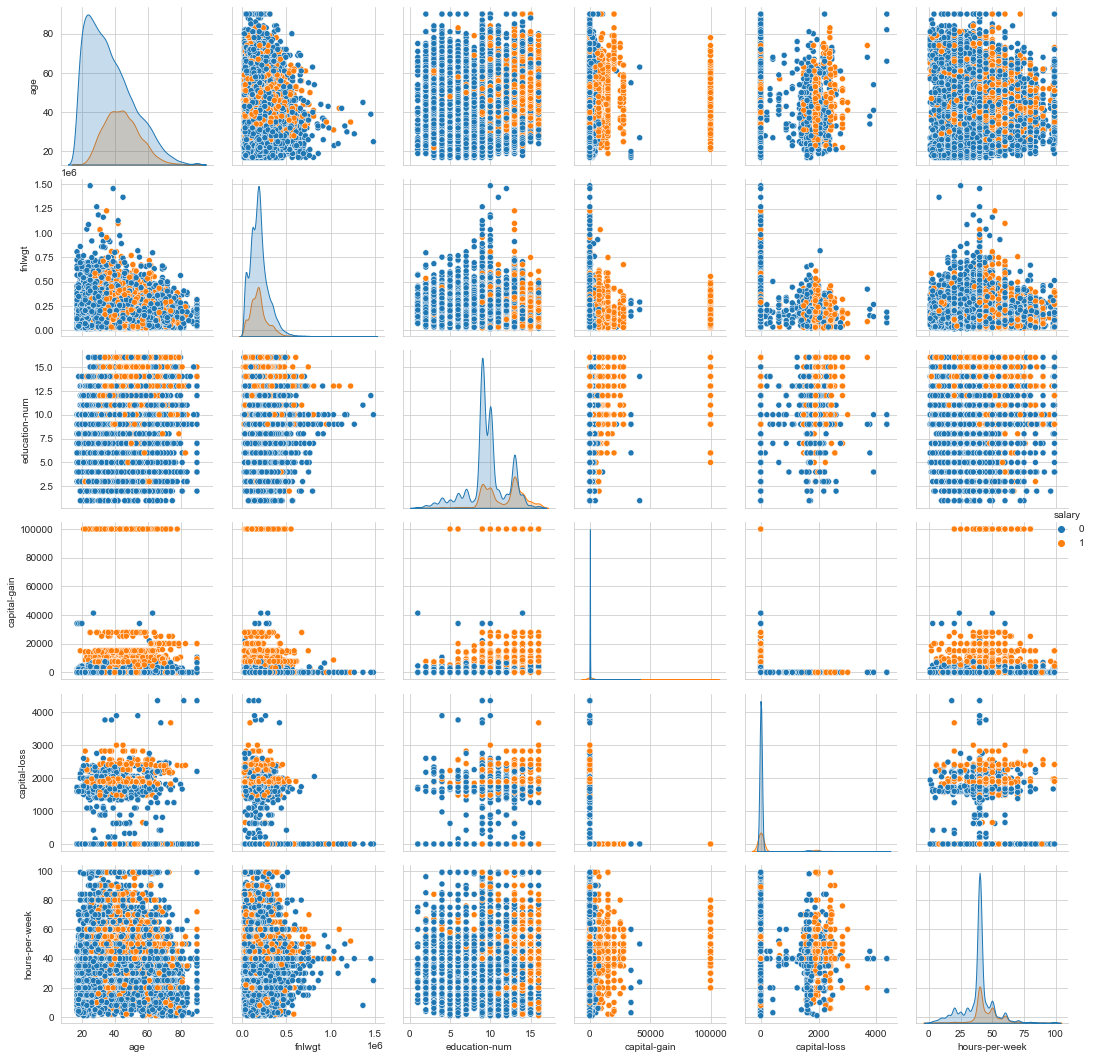

In [34]:
sns.pairplot(df,diag_kind='kde',hue='salary')

## Features group 1

### Preprocessing for Modeling

In [17]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [18]:
df = pd.get_dummies(df,drop_first=True)

import sklearn libraries

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,confusion_matrix, plot_confusion_matrix


In [20]:
# choose all features of the dataset
# Splitting the dataset into independent and dependent vaiables and then  train and test the model

X = df.drop(columns=['salary'],axis=1)
y = df[['salary']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### Features Scaling

In [21]:
#performe features scaling because there are differnt data units and values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling

##### 1) Using Logistic Regression

In [22]:
# applay modeling by using X_train_scaled,y_train and apply Logistic Regression algorithm 
lr = LogisticRegression(random_state=0)
lr.fit(X_train_scaled,y_train)


C:\Users\manal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [37]:
# now I will use X_test_scaled data to get the predection
ylr_pred = lr.predict(X_test_scaled)

##### Model Evaluation

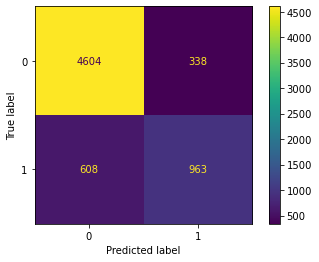

In [38]:
plot_confusion_matrix(lr,X_test_scaled,y_test)
plt.show()

In [39]:
print(classification_report(y_test,ylr_pred ))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4942
           1       0.74      0.61      0.67      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513



from the classification_report It can be seen the f1-score weighted avg  is 85%

In [43]:
print('ROCAUC score:',roc_auc_score(y_test, ylr_pred))
print('Accuracy score:',accuracy_score(y_test, ylr_pred))
print('F1 score:',f1_score(y_test, ylr_pred))



ROCAUC score: 0.7722959983163061
Accuracy score: 0.8547520343927529
F1 score: 0.6706128133704735


In [121]:
accuracy_score(ylr_pred, y_test)

0.8547520343927529

##### 2) Using KNN 

Here I will use KNN model to compare result with LR model

In [122]:
# import KNeighborsClassifier library
from sklearn.neighbors import KNeighborsClassifier

In [123]:
# apply the KNN model on X_train_scaled and y_train data and calculate the predection
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled,y_train)
pred_knn = knn.predict(X_test_scaled)


C:\Users\manal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [124]:
# Printing classification_report which help in the model evaluation
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4942
           1       0.73      0.47      0.57      1571

    accuracy                           0.83      6513
   macro avg       0.79      0.71      0.73      6513
weighted avg       0.82      0.83      0.82      6513



from the classification_report It can be seen the f1-score weighted avg for KNN model   is 83%

In [125]:
# here I used differnt metrics to evaluate the model and compare it with LR model result
print('ROCAUC score:',roc_auc_score(y_test, pred_knn))
print('Accuracy score:',accuracy_score(y_test, pred_knn))
print('F1 score:',f1_score(y_test, pred_knn))

ROCAUC score: 0.7073925131783301
Accuracy score: 0.8297251650545063
F1 score: 0.5716492854383932


<Figure size 1080x2160 with 0 Axes>

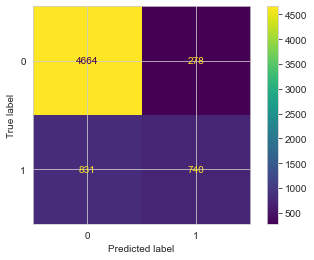

In [126]:
plt.figure(figsize=(15,30))
plot_confusion_matrix(knn,X_test_scaled,y_test)
plt.show()

4640 times the model correctly predicted the class 0 when the actual class was 0 (True Negative)
747 times the model correctly predicted the class 1 when the actual class was 1 (True Positive)
similarly the rest can be interpreted

from the above report the performanc of LR is better than KNN model

##### Using Random Forest Classifier

In [129]:
# import RandomForestClassifier library
from sklearn.ensemble import RandomForestClassifier

In [130]:
# apply Random Forest Classifier on X_train and  y_train data and the calculate the predection using X_test data
rfc = RandomForestClassifier()

# fit the predictor and target

rfc.fit(X_train, y_train)

# predict
rfc_predict = rfc.predict(X_test)# check performance

<ipython-input-130-9110750a5b35>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [131]:
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4942
           1       0.72      0.63      0.67      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.79      6513
weighted avg       0.84      0.85      0.85      6513



from the classification_report It can be seen the f1-score weighted avg for Random Forest  model is 85%

In [132]:
print('ROCAUC score:',roc_auc_score(y_test,rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 0.7735015163805941
Accuracy score: 0.8499923230462153
F1 score: 0.6680258239891267


<Figure size 1080x1440 with 0 Axes>

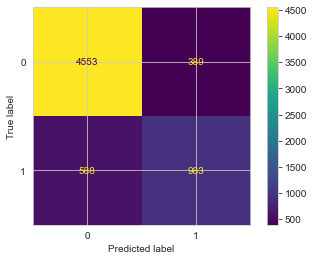

In [133]:
plt.figure(figsize=(15,20))
plot_confusion_matrix(rfc,X_test,y_test)
plt.show()

from the above report the performanc of RF model  is nearly similar to LR model

### Features group #2

in this group I chosed some features based on corelation report for modelling and I will work on df2 and I will follow the same steps as Features group #1

In [134]:

df2.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [135]:

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education-num   32561 non-null  int64 
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital-gain    32561 non-null  int64 
 9   capital-loss    32561 non-null  int64 
 10  hours-per-week  32561 non-null  int64 
 11  native-country  32561 non-null  object
 12  salary          32561 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 3.2+ MB


In [136]:
# create new data frame called G2 which hold numeric features only
df2= df.select_dtypes(include=['int64', 'float64']).columns
G2 = df[df2]
G2.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary
0,39,13,2174,0,40,0
1,50,13,0,0,13,0
2,38,9,0,0,40,0
3,53,7,0,0,40,0
4,28,13,0,0,40,0


In [137]:
G2.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'salary'],
      dtype='object')

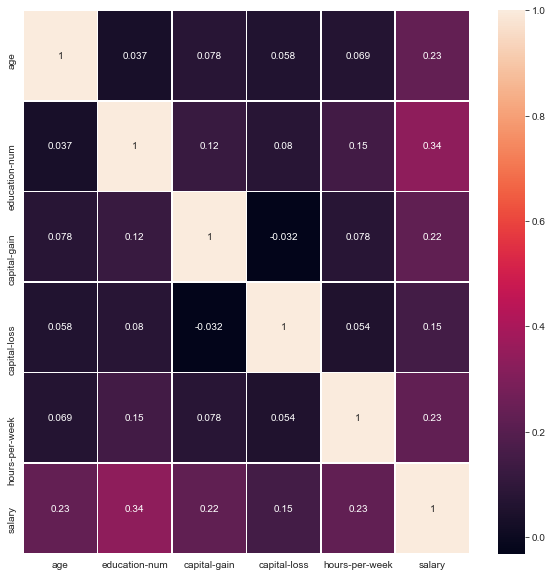

In [138]:
features = G2.corr()
top_correlations_features = features.index
plt.figure(figsize=(10,10))
sns.heatmap(G2[top_correlations_features].corr(),annot=True,linewidths=.5)
plt.show() 

In [140]:
# in this step I will 
# 1- Split the dataset into independent (which contains the best features) and dependent vaiables (Salary)
# 2 train and test data
Xg2 = G2.drop(columns=['capital-loss','salary'],axis=1)
yg2 = G2[['salary']]
Xg2_train, Xg2_test, yg2_train, yg2_test = train_test_split(Xg2, yg2, test_size=0.2, random_state=42)

##### Features Scaling

In [141]:
# performe features scaling because there are differnt data units and values
scaler = StandardScaler()
Xg2_train_scaled = scaler.fit_transform(Xg2_train)
Xg2_test_scaled = scaler.transform(Xg2_test)

#### Modeling

##### 1) using Logistic Regression

In [142]:
lrg2 = LogisticRegression()
lr.fit(Xg2_train_scaled,yg2_train)
yg2_predlr = lr.predict(Xg2_test_scaled)

C:\Users\manal\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


###### Model Evaluation

In [143]:
print(classification_report(yg2_test,yg2_predlr))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4942
           1       0.69      0.38      0.49      1571

    accuracy                           0.81      6513
   macro avg       0.76      0.66      0.69      6513
weighted avg       0.80      0.81      0.79      6513



the classification report shows the f1-score weighted avg is 79%

In [144]:
print('ROCAUC score:',roc_auc_score(yg2_test, yg2_predlr))
print('Accuracy score:',accuracy_score(y_test,yg2_predlr))
print('F1 score:',f1_score(y_test, yg2_predlr))

ROCAUC score: 0.6644831799349861
Accuracy score: 0.8100721633655765
F1 score: 0.4932404752150758


From the above results it is appeared the LR which applied on all feature is better

##### 2) Using KNN Algorithm

In [145]:
knng2 = KNeighborsClassifier(n_neighbors=4)
knn.fit(Xg2_train_scaled,yg2_train)
pred_knng2 = knn.predict(Xg2_test_scaled)

C:\Users\manal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


###### Model Evaluation

In [146]:
print(classification_report(yg2_test,pred_knng2))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      4942
           1       0.65      0.37      0.47      1571

    accuracy                           0.80      6513
   macro avg       0.74      0.65      0.67      6513
weighted avg       0.78      0.80      0.78      6513



from the classification report the model shows  bad performance

In [147]:
print('ROCAUC score:',roc_auc_score(yg2_test, pred_knng2))
print('Accuracy score:',accuracy_score(yg2_test,pred_knng2))
print('F1 score:',f1_score(yg2_test, pred_knng2))

ROCAUC score: 0.6532762218694205
Accuracy score: 0.799324428066943
F1 score: 0.47149211484027503


and here also it shows worse performance than KNN which is applied on all features

##### 3) Using Random Forest Classifier¶

In [148]:
rfc_g2 = RandomForestClassifier()

# fit the predictor and target

rfc.fit(Xg2_train, yg2_train)

# predict
rfc_predict_g2 = rfc.predict(Xg2_test)# check performance

<ipython-input-148-57bdeba29731>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(Xg2_train, yg2_train)


###### Model Evaluation

In [149]:
print(classification_report(yg2_test,rfc_predict_g2))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4942
           1       0.64      0.46      0.53      1571

    accuracy                           0.81      6513
   macro avg       0.74      0.69      0.71      6513
weighted avg       0.79      0.81      0.79      6513



From the classification report RF model is slitly better than LR 

In [150]:
print('ROCAUC score:',roc_auc_score(yg2_test, rfc_predict_g2))
print('Accuracy score:',accuracy_score(yg2_test,rfc_predict_g2))
print('F1 score:',f1_score(yg2_test, rfc_predict_g2))

ROCAUC score: 0.6879040665481522
Accuracy score: 0.8060801473975127
F1 score: 0.5334318433690433


it is appeared from the above metrics RF model which contain all features is better

To sum up, all models show better performance when they use all features. Moreover, LR is the better

# Thank You